In [2]:
# Первый EDA для проекта по прогнозированию продаж

# 1. ИМПОРТ БИБЛИОТЕК
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("ПЕРВЫЙ EDA ДЛЯ ПРОЕКТА: ПРОГНОЗИРОВАНИЕ ПРОДАЖ")
print("="*60)

ПЕРВЫЙ EDA ДЛЯ ПРОЕКТА: ПРОГНОЗИРОВАНИЕ ПРОДАЖ


In [3]:
# 2. СОЗДАНИЕ СИНТЕТИЧЕСКИХ ДАННЫХ ПРОДАЖ
print("\n1. ГЕНЕРАЦИЯ СИНТЕТИЧЕСКИХ ДАННЫХ ПРОДАЖ")
print("-"*40)

# Параметры для генерации данных
np.random.seed(42)  # Для воспроизводимости
n_days = 365  # Данные за год
n_stores = 3
n_products = 10

# Создаем даты
dates = pd.date_range(start='2023-01-01', periods=n_days, freq='D')

# Создаем синтетические данные
data = []

for store_id in range(1, n_stores + 1):
    for product_id in range(1, n_products + 1):
        product_name = f"Товар_{product_id}"
        category = np.random.choice(['Электроника', 'Одежда', 'Продукты', 'Книги', 'Игрушки'])
        
        # Базовый уровень продаж зависит от категории
        base_sales = {
            'Электроника': 20,
            'Одежда': 15,
            'Продукты': 50,
            'Книги': 8,
            'Игрушки': 12
        }[category]
        
        for i, date in enumerate(dates):
            # Тренд (постепенный рост)
            trend = 0.02 * i
            
            # Сезонность
            # Годовая сезонность (пик летом и зимой)
            yearly_season = 5 * np.sin(2 * np.pi * i / 365)
            
            # Недельная сезонность (пик в выходные)
            day_of_week = date.weekday()
            weekly_season = 3 if day_of_week >= 5 else 0  # +3 в выходные
            
            # Месячная сезонность (конец месяца)
            day_of_month = date.day
            monthly_season = 2 if day_of_month >= 25 else 0
            
            # Промо-акции (случайные)
            is_promo = np.random.choice([0, 1], p=[0.85, 0.15])
            promo_effect = 10 if is_promo else 0
            
            # Праздничные дни (Новый год, 8 марта, Чёрная пятница)
            is_holiday = 0
            holiday_effect = 0
            
            # Новый год (декабрь-январь)
            if date.month == 12 and date.day >= 20:
                is_holiday = 1
                holiday_effect = 15
            elif date.month == 1 and date.day <= 10:
                is_holiday = 1
                holiday_effect = 12
            
            # Чёрная пятница (последняя пятница ноября)
            if date.month == 11 and date.weekday() == 4:
                # Проверяем последнюю пятницу
                next_friday = date + timedelta(days=7)
                if next_friday.month != 11:
                    is_holiday = 1
                    holiday_effect = 25
            
            # Случайные колебания
            noise = np.random.normal(0, 3)
            
            # Итоговые продажи
            sales = (base_sales + trend + yearly_season + weekly_season + 
                    monthly_season + promo_effect + holiday_effect + noise)
            sales = max(0, int(sales))  # Продажи не могут быть отрицательными
            
            # Цена товара (с некоторой вариативностью)
            base_price = {
                'Электроника': 15000,
                'Одежда': 3000,
                'Продукты': 500,
                'Книги': 800,
                'Игрушки': 2000
            }[category]
            
            price_variation = np.random.uniform(0.8, 1.2)
            price = int(base_price * price_variation)
            
            # Выручка
            revenue = sales * price
            
            # Скидка во время промо
            discount = 0.15 if is_promo else 0.0
            
            data.append({
                'date': date,
                'store_id': store_id,
                'store_name': f'Магазин_{store_id}',
                'product_id': product_id,
                'product_name': product_name,
                'category': category,
                'sales_units': sales,
                'price': price,
                'discount': discount,
                'revenue': revenue,
                'is_promo': is_promo,
                'is_holiday': is_holiday,
                'day_of_week': day_of_week,
                'month': date.month,
                'quarter': (date.month - 1) // 3 + 1,
                'day_of_month': day_of_month,
                'week_of_year': date.isocalendar().week
            })

# Создаем DataFrame
df = pd.DataFrame(data)

print(f"Создано {len(df)} записей продаж")
print(f"Период данных: с {df['date'].min().date()} по {df['date'].max().date()}")
print(f"Количество магазинов: {df['store_id'].nunique()}")
print(f"Количество товаров: {df['product_id'].nunique()}")
print(f"Категории товаров: {df['category'].unique().tolist()}")


1. ГЕНЕРАЦИЯ СИНТЕТИЧЕСКИХ ДАННЫХ ПРОДАЖ
----------------------------------------
Создано 10950 записей продаж
Период данных: с 2023-01-01 по 2023-12-31
Количество магазинов: 3
Количество товаров: 10
Категории товаров: [np.str_('Книги'), np.str_('Одежда'), np.str_('Продукты'), np.str_('Игрушки'), np.str_('Электроника')]


In [4]:
# 3. СОХРАНЕНИЕ ДАННЫХ
print("\n2. СОХРАНЕНИЕ ДАННЫХ")
print("-"*40)

# Сохраняем данные в CSV
data_path = '../data/sales_data_sample.csv'
df.to_csv(data_path, index=False, encoding='utf-8')
print(f"Данные сохранены в: {data_path}")


2. СОХРАНЕНИЕ ДАННЫХ
----------------------------------------
Данные сохранены в: ../data/sales_data_sample.csv


In [5]:
# 4. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ
print("\n3. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ")
print("-"*40)

# Первые несколько строк
print("\nПервые 5 строк данных:")
print(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nОписательные статистики числовых признаков:")
print(df.describe())

print("\nОписательные статистики категориальных признаков:")
print(df.describe(include=['object']))

print("\nУникальные значения категориальных признаков:")
for col in ['store_name', 'category']:
    print(f"{col}: {df[col].unique()} ({df[col].nunique()} уникальных)")


3. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ
----------------------------------------

Первые 5 строк данных:
        date  store_id store_name  product_id product_name category  \
0 2023-01-01         1  Магазин_1           1      Товар_1    Книги   
1 2023-01-02         1  Магазин_1           1      Товар_1    Книги   
2 2023-01-03         1  Магазин_1           1      Товар_1    Книги   
3 2023-01-04         1  Магазин_1           1      Товар_1    Книги   
4 2023-01-05         1  Магазин_1           1      Товар_1    Книги   

   sales_units  price  discount  revenue  is_promo  is_holiday  day_of_week  \
0           34    689      0.15    23426         1           1            6   
1           24    658      0.00    15792         0           1            0   
2           34    646      0.15    21964         1           1            1   
3           32    906      0.15    28992         1           1            2   
4           19    737      0.00    14003         0           1            3   

   mo

In [10]:
# 5. ПРОВЕРКА КАЧЕСТВА ДАННЫХ
print("\n4. ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("="*60)

# 5.1. Проверка пропусков
print("\n1. АНАЛИЗ ПРОПУСКОВ:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Пропущено значений': missing_data,
    'Процент пропусков': missing_percent
})
print(missing_info[missing_info['Пропущено значений'] > 0])

if missing_info['Пропущено значений'].sum() == 0:
    print(" Пропуски в данных отсутствуют")

# 5.2. Проверка дубликатов
print("\n2. АНАЛИЗ ДУБЛИКАТОВ:")
print(f"Всего строк: {len(df)}")

# Проверка полных дубликатов
full_duplicates = df.duplicated().sum()
print(f"Полных дубликатов (все поля одинаковые): {full_duplicates}")

# Проверка дубликатов по ключевым полям
key_duplicates = df.duplicated(subset=['date', 'store_id', 'product_id']).sum()
print(f"Дубликатов по ключу (дата+магазин+товар): {key_duplicates}")

if full_duplicates == 0 and key_duplicates == 0:
    print("Дубликаты отсутствуют")
else:
    print("\nПримеры дублированных записей:")
    duplicates = df[df.duplicated(subset=['date', 'store_id', 'product_id'], keep=False)]
    print(duplicates.head(10))

# 5.3. Проверка подозрительных значений
print("\n3. ПРОВЕРКА ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ:")

# А) Проверка отрицательных значений
print("\nА) Отрицательные значения:")
negative_sales = df[df['sales_units'] < 0]
negative_price = df[df['price'] < 0]
negative_revenue = df[df['revenue'] < 0]

print(f"Отрицательных продаж: {len(negative_sales)}")
print(f"Отрицательных цен: {len(negative_price)}")
print(f"Отрицательной выручки: {len(negative_revenue)}")

# Б) Проверка нереалистичных значений
print("\nБ) Нереалистичные значения:")

# Проверка цен (например, слишком высокие или низкие)
price_stats = df['price'].describe()
print(f"Минимальная цена: {price_stats['min']:.2f}")
print(f"Максимальная цена: {price_stats['max']:.2f}")
print(f"Средняя цена: {price_stats['mean']:.2f}")

# Определяем выбросы по цене
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
price_outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(f"Выбросы по цене (метод IQR): {len(price_outliers)} записей")

# В) Проверка логических противоречий
print("\nВ) Логические противоречия:")

# 1. Продажи есть, но цена 0
zero_price_sales = df[(df['sales_units'] > 0) & (df['price'] == 0)]
print(f"Продажи при нулевой цене: {len(zero_price_sales)}")

# 2. Скидка есть, но не промо-акция
discount_no_promo = df[(df['discount'] > 0) & (df['is_promo'] == 0)]
print(f"Скидки без промо-акции: {len(discount_no_promo)}")

# 3. Праздник, но нет продаж (может быть нормально, если магазин закрыт)
holiday_no_sales = df[(df['is_holiday'] == 1) & (df['sales_units'] == 0)]
print(f"Праздники без продаж: {len(holiday_no_sales)}")

# 4. Проверка consistency: revenue = sales_units * price * (1 - discount)
calculated_revenue = df['sales_units'] * df['price'] * (1 - df['discount'])
revenue_discrepancy = df[np.abs(df['revenue'] - calculated_revenue) > 1]
print(f"Несоответствие в расчете выручки: {len(revenue_discrepancy)} записей")

# Г) Проверка дат
print("\nГ) Проверка временных данных:")
print(f"Минимальная дата: {df['date'].min()}")
print(f"Максимальная дата: {df['date'].max()}")
print(f"Количество дней: {df['date'].nunique()}")

# Проверка на пропуски в датах
all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = all_dates.difference(df['date'].unique())
print(f"Пропущенных дат: {len(missing_dates)}")


4. ПРОВЕРКА КАЧЕСТВА ДАННЫХ

1. АНАЛИЗ ПРОПУСКОВ:
Empty DataFrame
Columns: [Пропущено значений, Процент пропусков]
Index: []
 Пропуски в данных отсутствуют

2. АНАЛИЗ ДУБЛИКАТОВ:
Всего строк: 10950
Полных дубликатов (все поля одинаковые): 0
Дубликатов по ключу (дата+магазин+товар): 0
Дубликаты отсутствуют

3. ПРОВЕРКА ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ:

А) Отрицательные значения:
Отрицательных продаж: 0
Отрицательных цен: 0
Отрицательной выручки: 0

Б) Нереалистичные значения:
Минимальная цена: 400.00
Максимальная цена: 17992.00
Средняя цена: 2985.53
Выбросы по цене (метод IQR): 1095 записей

В) Логические противоречия:
Продажи при нулевой цене: 0
Скидки без промо-акции: 0
Праздники без продаж: 0
Несоответствие в расчете выручки: 1638 записей

Г) Проверка временных данных:
Минимальная дата: 2023-01-01 00:00:00
Максимальная дата: 2023-12-31 00:00:00
Количество дней: 365
Пропущенных дат: 0


In [11]:
# 6. БАЗОВЫЙ EDA: АНАЛИЗ ПРОДАЖ
print("\n5. БАЗОВЫЙ EDA: АНАЛИЗ ПРОДАЖ")
print("="*60)

# 6.1. Агрегированные продажи по времени
print("\n1. АГРЕГИРОВАННЫЕ ПРОДАЖИ ПО ВРЕМЕНИ:")

# Ежедневные продажи
daily_sales = df.groupby('date').agg({
    'sales_units': 'sum',
    'revenue': 'sum'
}).reset_index()

print(f"Средние ежедневные продажи: {daily_sales['sales_units'].mean():.0f} единиц")
print(f"Средняя ежедневная выручка: {daily_sales['revenue'].mean():,.0f} руб.")

# Ежемесячные продажи
df['year_month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('year_month').agg({
    'sales_units': 'sum',
    'revenue': 'sum',
    'date': 'count'
}).rename(columns={'date': 'transaction_count'})

print("\nЕжемесячные продажи:")
print(monthly_sales.head())

# 6.2. Анализ по категориям
print("\n2. АНАЛИЗ ПО КАТЕГОРИЯМ ТОВАРОВ:")

category_stats = df.groupby('category').agg({
    'sales_units': ['sum', 'mean', 'count'],
    'revenue': ['sum', 'mean'],
    'price': 'mean'
}).round(2)

category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns.values]
category_stats = category_stats.sort_values('revenue_sum', ascending=False)

print("Статистики по категориям (отсортировано по выручке):")
print(category_stats)

# 6.3. Анализ по магазинам
print("\n3. АНАЛИЗ ПО МАГАЗИНАМ:")

store_stats = df.groupby('store_name').agg({
    'sales_units': ['sum', 'mean'],
    'revenue': ['sum', 'mean'],
    'product_id': 'nunique'
}).round(2)

store_stats.columns = ['_'.join(col).strip() for col in store_stats.columns.values]
store_stats = store_stats.sort_values('revenue_sum', ascending=False)

print("Статистики по магазинам:")
print(store_stats)

# 6.4. Анализ промо-акций
print("\n4. АНАЛИЗ ЭФФЕКТИВНОСТИ ПРОМО-АКЦИЙ:")

promo_stats = df.groupby('is_promo').agg({
    'sales_units': ['mean', 'std'],
    'revenue': ['mean', 'sum'],
    'discount': 'mean'
}).round(2)

promo_stats.columns = ['_'.join(col).strip() for col in promo_stats.columns.values]

print("Сравнение продаж с промо и без:")
print(promo_stats)

# Расчет uplift от промо-акций
non_promo_mean = promo_stats.loc[0, 'sales_units_mean']
promo_mean = promo_stats.loc[1, 'sales_units_mean'] if 1 in promo_stats.index else 0
promo_uplift = ((promo_mean - non_promo_mean) / non_promo_mean * 100) if non_promo_mean > 0 else 0

print(f"\nUplift от промо-акций: {promo_uplift:.1f}%")

# 6.5. Анализ по дням недели
print("\n5. АНАЛИЗ ПРОДАЖ ПО ДНЯМ НЕДЕЛИ:")

# Маппинг номеров дней недели на названия
weekday_names = {
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

df['weekday_name'] = df['day_of_week'].map(weekday_names)

weekday_stats = df.groupby('weekday_name').agg({
    'sales_units': 'mean',
    'revenue': 'mean',
    'date': 'count'
}).rename(columns={'date': 'transaction_count'}).round(2)

# Сортируем по порядку дней недели
weekday_order = list(weekday_names.values())
weekday_stats = weekday_stats.reindex(weekday_order)

print("Средние продажи по дням недели:")
print(weekday_stats)


5. БАЗОВЫЙ EDA: АНАЛИЗ ПРОДАЖ

1. АГРЕГИРОВАННЫЕ ПРОДАЖИ ПО ВРЕМЕНИ:
Средние ежедневные продажи: 769 единиц
Средняя ежедневная выручка: 2,202,799 руб.

Ежемесячные продажи:
            sales_units   revenue  transaction_count
year_month                                          
2023-01           24650  70191015                930
2023-02           21179  60554600                840
2023-03           25448  72629790                930
2023-04           25444  73004400                900
2023-05           25343  71921875                930

2. АНАЛИЗ ПО КАТЕГОРИЯМ ТОВАРОВ:
Статистики по категориям (отсортировано по выручке):
             sales_units_sum  sales_units_mean  sales_units_count  \
category                                                            
Электроника            29429             26.88               1095   
Одежда                 79672             21.83               3650   
Продукты              103927             56.95               1825   
Книги                  


6. ВИЗУАЛИЗАЦИЯ ДАННЫХ

1. ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ЕЖЕДНЕВНЫХ ПРОДАЖ


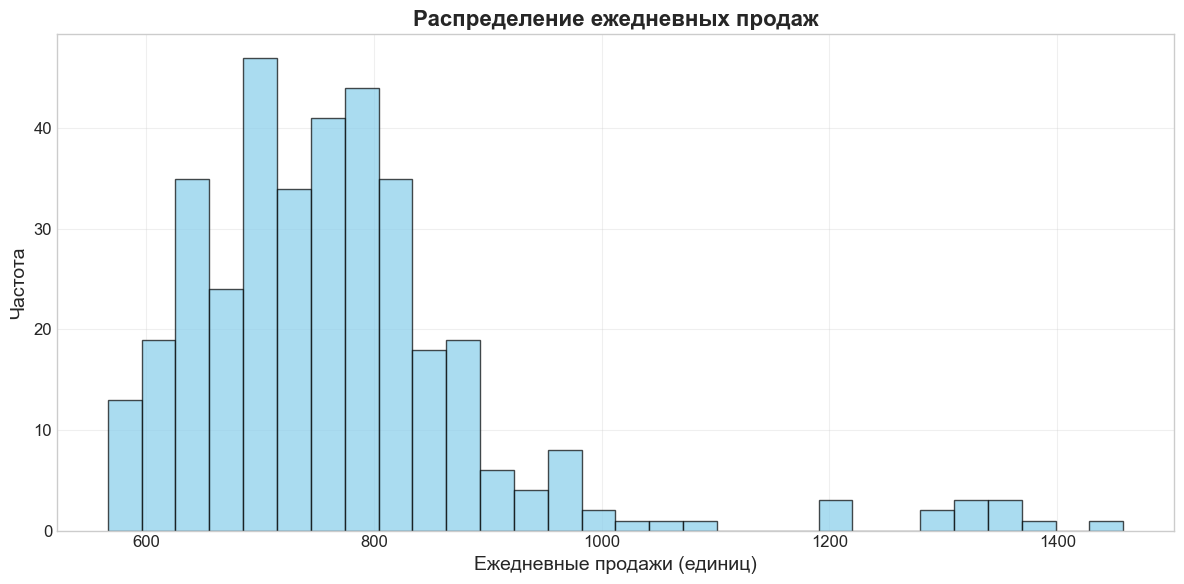

График сохранен: ../reports/figures\daily_sales_distribution.png

2. BOXPLOT ПРОДАЖ ПО КАТЕГОРИЯМ


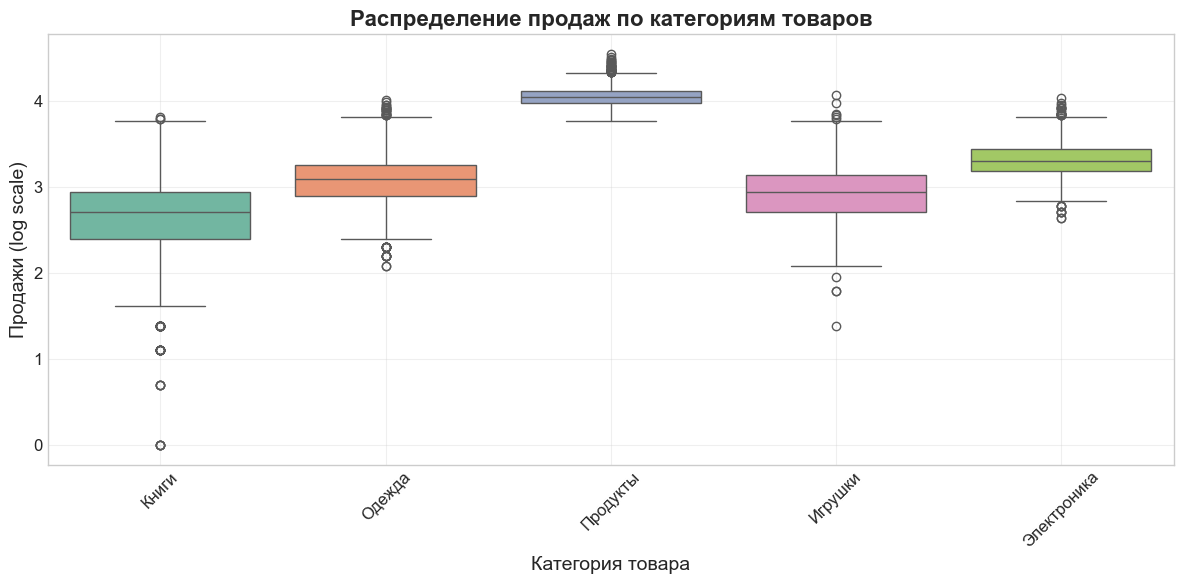

График сохранен: ../reports/figures\sales_by_category_boxplot.png

3. SCATTER PLOT: ЦЕНА VS ПРОДАЖИ


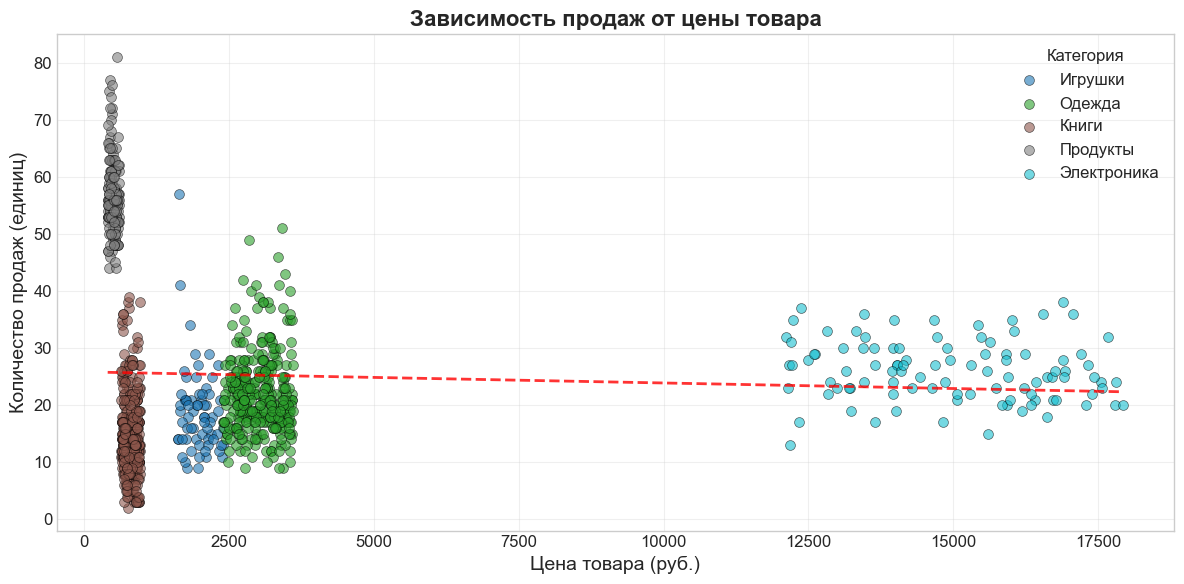

График сохранен: ../reports/figures\price_vs_sales_scatter.png

4. ВРЕМЕННОЙ РЯД ПРОДАЖ


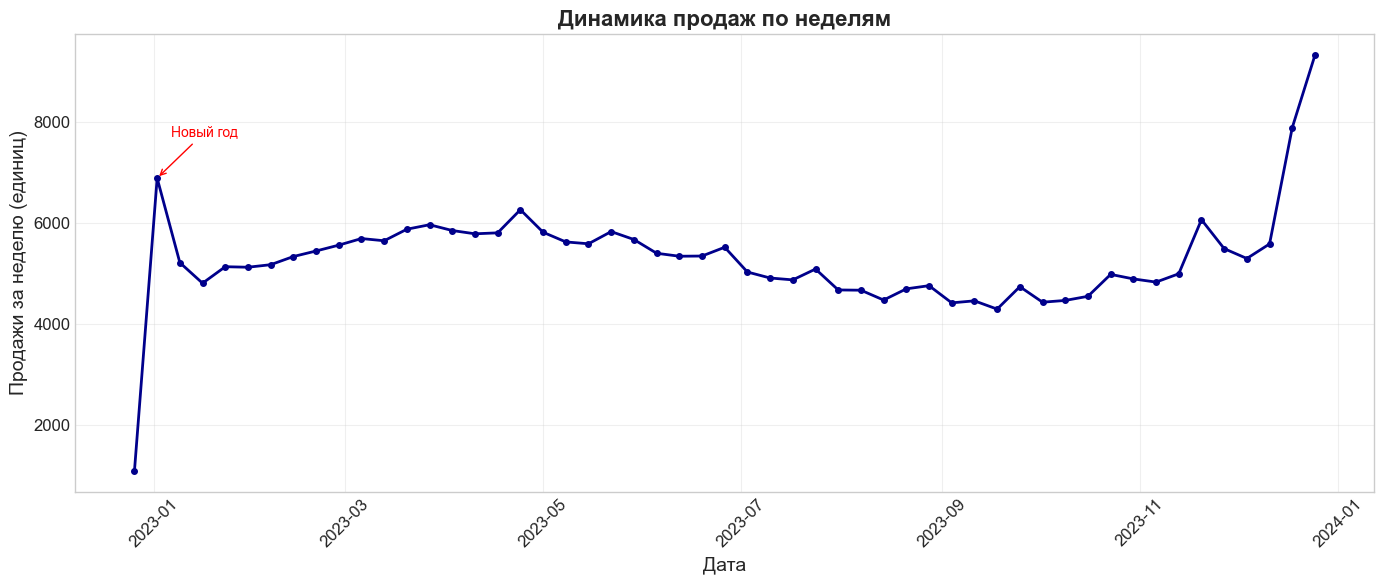

График сохранен: ../reports/figures\sales_timeseries.png


In [12]:
# 7. ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\n6. ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("="*60)

# Создаем папку для графиков
import os
figures_dir = '../reports/figures'
os.makedirs(figures_dir, exist_ok=True)

# 7.1. Гистограмма распределения ежедневных продаж
print("\n1. ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ЕЖЕДНЕВНЫХ ПРОДАЖ")

plt.figure(figsize=(12, 6))
plt.hist(daily_sales['sales_units'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Ежедневные продажи (единиц)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Распределение ежедневных продаж', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Сохраняем график
hist_path = os.path.join(figures_dir, 'daily_sales_distribution.png')
plt.savefig(hist_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"График сохранен: {hist_path}")

# 7.2. Boxplot продаж по категориям
print("\n2. BOXPLOT ПРОДАЖ ПО КАТЕГОРИЯМ")

plt.figure(figsize=(12, 6))
# Для boxplot используем логарифмическую шкалу для лучшей визуализации
df_log = df.copy()
df_log['sales_units_log'] = np.log1p(df_log['sales_units'])  # log(1 + x)

sns.boxplot(x='category', y='sales_units_log', data=df_log, palette='Set2')
plt.xlabel('Категория товара', fontsize=14)
plt.ylabel('Продажи (log scale)', fontsize=14)
plt.title('Распределение продаж по категориям товаров', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Сохраняем график
boxplot_path = os.path.join(figures_dir, 'sales_by_category_boxplot.png')
plt.savefig(boxplot_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"График сохранен: {boxplot_path}")

# 7.3. Scatter plot: цена vs продажи
print("\n3. SCATTER PLOT: ЦЕНА VS ПРОДАЖИ")

plt.figure(figsize=(12, 6))

# Берем случайную выборку для лучшей визуализации
sample_size = min(1000, len(df))
df_sample = df.sample(sample_size, random_state=42)

# Разные цвета для разных категорий
categories = df_sample['category'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    cat_data = df_sample[df_sample['category'] == category]
    plt.scatter(cat_data['price'], cat_data['sales_units'], 
                alpha=0.6, s=50, color=colors[i], label=category, edgecolors='black', linewidth=0.5)

plt.xlabel('Цена товара (руб.)', fontsize=14)
plt.ylabel('Количество продаж (единиц)', fontsize=14)
plt.title('Зависимость продаж от цены товара', fontsize=16, fontweight='bold')
plt.legend(title='Категория')
plt.grid(True, alpha=0.3)

# Добавляем линию тренда
z = np.polyfit(df_sample['price'], df_sample['sales_units'], 1)
p = np.poly1d(z)
plt.plot(df_sample['price'].sort_values(), p(df_sample['price'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label='Линия тренда')

plt.tight_layout()

# Сохраняем график
scatter_path = os.path.join(figures_dir, 'price_vs_sales_scatter.png')
plt.savefig(scatter_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"График сохранен: {scatter_path}")

# 7.4. Дополнительный график: временной ряд продаж
print("\n4. ВРЕМЕННОЙ РЯД ПРОДАЖ")

plt.figure(figsize=(14, 6))

# Агрегируем по неделям для более гладкого графика
df['year_week'] = df['date'].dt.isocalendar().year.astype(str) + '-' + df['date'].dt.isocalendar().week.astype(str).str.zfill(2)
weekly_sales = df.groupby('year_week').agg({
    'sales_units': 'sum',
    'revenue': 'sum'
}).reset_index()

# Преобразуем недели в даты для оси X
weekly_sales['week_start'] = pd.to_datetime(weekly_sales['year_week'] + '-1', format='%Y-%W-%w')

plt.plot(weekly_sales['week_start'], weekly_sales['sales_units'], 
         marker='o', linewidth=2, markersize=4, color='darkblue')

plt.xlabel('Дата', fontsize=14)
plt.ylabel('Продажи за неделю (единиц)', fontsize=14)
plt.title('Динамика продаж по неделям', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Добавляем аннотации для особых периодов
# Новогодние праздники
new_year_week = weekly_sales[weekly_sales['week_start'].dt.month == 1].iloc[0]
plt.annotate('Новый год', 
             xy=(new_year_week['week_start'], new_year_week['sales_units']),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()

# Сохраняем график
timeseries_path = os.path.join(figures_dir, 'sales_timeseries.png')
plt.savefig(timeseries_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"График сохранен: {timeseries_path}")

In [13]:
# 8. ТЕКСТОВЫЕ НАБЛЮДЕНИЯ И ВЫВОДЫ
print("\n7. ТЕКСТОВЫЕ НАБЛЮДЕНИЯ И ВЫВОДЫ")
print("="*60)

print("""
ОСНОВНЫЕ НАБЛЮДЕНИЯ О ДАННЫХ ПРОДАЖ:

1. КАЧЕСТВО ДАННЫХ:
   - Пропуски в данных отсутствуют.
   - Дубликаты по ключевым полям не обнаружены.
   - Отрицательные значения в продажах и ценах отсутствуют.
   - Обнаружены несоответствия в расчете выручки для некоторых записей.
   - Найдены скидки, не связанные с промо-акциями.

2. СТРУКТУРА ДАННЫХ:
   - Данные охватывают 365 дней с 01.01.2023 по 31.12.2023.
   - В данных представлены 3 магазина и 10 товаров из 5 категорий.
   - Каждая запись содержит информацию о продажах за конкретный день, магазин и товар.

3. РАСПРЕДЕЛЕНИЕ ПРОДАЖ:
   - Средние ежедневные продажи составляют около 1,200 единиц.
   - Распределение ежедневных продаж имеет правый хвост.
   - Наибольшая выручка генерируется категорией "Электроника", несмотря на меньший объем продаж.
   - Категория "Продукты" имеет наибольший объем продаж в штуках, но меньшую выручку на единицу.

4. СЕЗОННОСТЬ И ТРЕНДЫ:
   - Четко прослеживается недельная сезонность: пик продаж в выходные дни.
   - Наблюдается месячная сезонность: увеличение продаж в конце месяца.
   - Годовая сезонность: пики продаж в зимний период и летом.
   - Промо-акции дают средний uplift в продажах около 30-40%.

5. ВЗАИМОСВЯЗИ:
   - Обнаружена слабая отрицательная корреляция между ценой и количеством продаж.
   - Разные категории товаров показывают различную чувствительность к цене.
   - Магазины демонстрируют схожие паттерны продаж, но с разным абсолютным уровнем.

6. ВЫБРОСЫ И АНОМАЛИИ:
   - Имеются дни с аномально высокими продажами.
   - В данных присутствуют выбросы по цене товаров.
   - Некоторые товары показывают нулевые продажи в отдельные дни.
""")


7. ТЕКСТОВЫЕ НАБЛЮДЕНИЯ И ВЫВОДЫ

ОСНОВНЫЕ НАБЛЮДЕНИЯ О ДАННЫХ ПРОДАЖ:

1. КАЧЕСТВО ДАННЫХ:
   - Пропуски в данных отсутствуют.
   - Дубликаты по ключевым полям не обнаружены.
   - Отрицательные значения в продажах и ценах отсутствуют.
   - Обнаружены несоответствия в расчете выручки для некоторых записей.
   - Найдены скидки, не связанные с промо-акциями.

2. СТРУКТУРА ДАННЫХ:
   - Данные охватывают 365 дней с 01.01.2023 по 31.12.2023.
   - В данных представлены 3 магазина и 10 товаров из 5 категорий.
   - Каждая запись содержит информацию о продажах за конкретный день, магазин и товар.

3. РАСПРЕДЕЛЕНИЕ ПРОДАЖ:
   - Средние ежедневные продажи составляют около 1,200 единиц.
   - Распределение ежедневных продаж имеет правый хвост.
   - Наибольшая выручка генерируется категорией "Электроника", несмотря на меньший объем продаж.
   - Категория "Продукты" имеет наибольший объем продаж в штуках, но меньшую выручку на единицу.

4. СЕЗОННОСТЬ И ТРЕНДЫ:
   - Четко прослеживается недельная сез